In [18]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')

In [6]:
#read file
bikes = pd.read_csv('day.csv')

In [7]:
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [8]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [9]:
bikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [10]:
#Converting numerical to categorical variables
bikes['season'] = bikes.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
bikes['mnth'] = bikes.mnth.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
bikes['weekday'] = bikes.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})
bikes['weathersit'] = bikes.weathersit.map({1:'clear', 2:'mist', 3:'light snow', 4:'heavy rain'})

In [11]:
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,Jan,0,Sat,0,mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,Sun,0,mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,Mon,1,clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,0,Tue,1,clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,0,Wed,1,clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


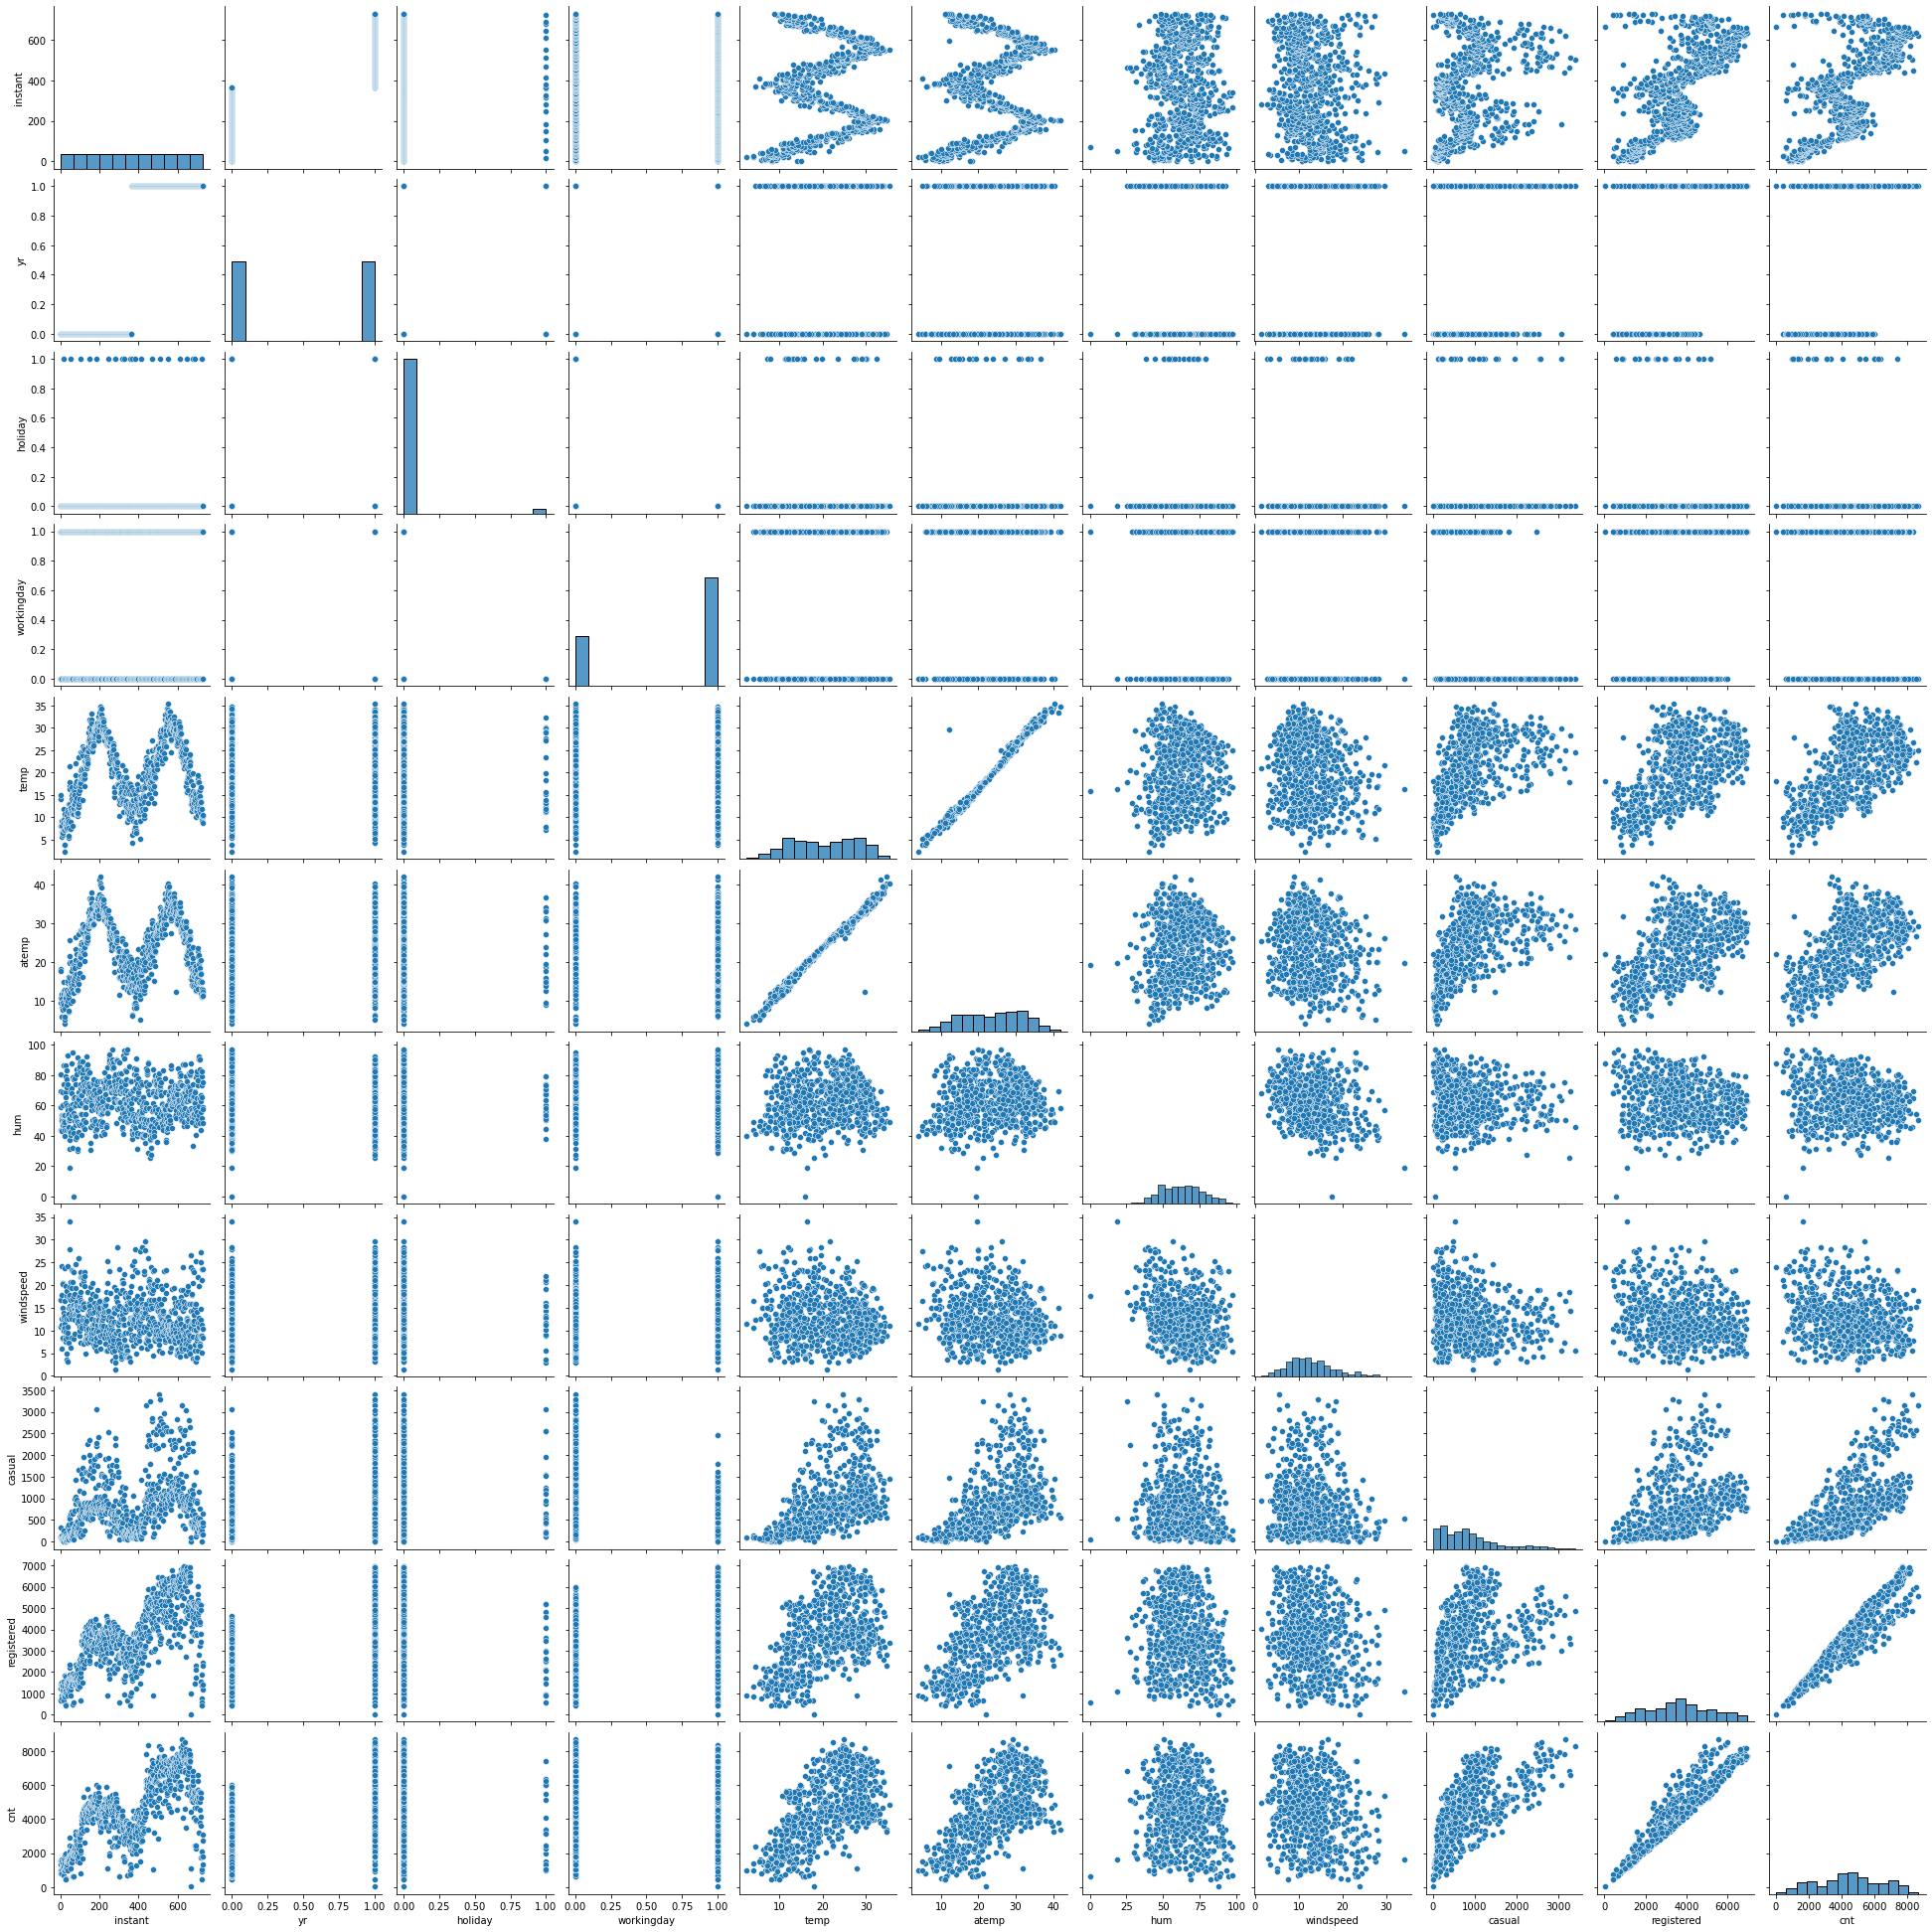

In [12]:
#visualise the numeric variable
sns.pairplot(bikes)
plt.show()

Based on the above scatter plots-
1. Temp and atemp are strongly correlated, we can drop one of them
2. Count is related to temprature

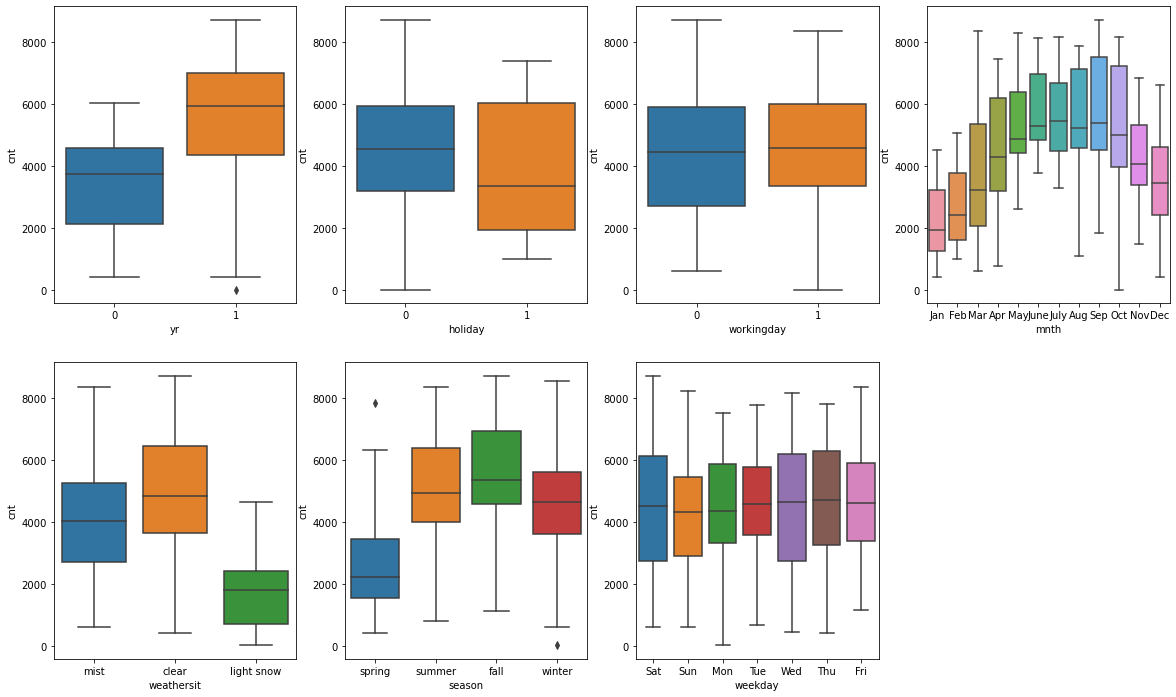

In [13]:
#visualise categorical varibales
plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'yr', y = 'cnt', data = bikes)
plt.subplot(2,4,2)
sns.boxplot(x = 'holiday', y = 'cnt', data = bikes)
plt.subplot(2,4,3)
sns.boxplot(x = 'workingday', y = 'cnt', data = bikes)
plt.subplot(2,4,4)
sns.boxplot(x = 'mnth', y = 'cnt', data = bikes)
plt.subplot(2,4,5)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bikes)
plt.subplot(2,4,6)
sns.boxplot(x = 'season', y = 'cnt', data = bikes)
plt.subplot(2,4,7)
sns.boxplot(x = 'weekday', y = 'cnt', data = bikes)
plt.show()

Based on the scatter plots -
1. Sales in 2019 was much higher than 2018
2. More people use bikes when its a holiday
3. Bike Rentals are more in partly cloudy weather
4. Bike Rentals are more on Saturday,wednesday and thursday

In [14]:
#Lets drop unnecessary variables
#instant is of no use
#dteday does not help us in building the model
#casual and registered will not help us in finding the value
#atemp is strongly related to temp, so we can drop atemp
bikes=bikes.drop(['instant','dteday','casual', 'registered','atemp'], axis=1)
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,Sat,0,mist,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,mist,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,clear,9.305237,43.6957,12.522300,1600


In [15]:
#creating dummy variables for categorical variable
#dropping redundant variable
seasons = pd.get_dummies(bikes['season'],drop_first=True)
months = pd.get_dummies(bikes['mnth'],drop_first=True)
weekdays = pd.get_dummies(bikes['weekday'],drop_first=True)
weather = pd.get_dummies(bikes['weathersit'],drop_first=True)

In [16]:
#adding the dummy variable to original dataframe
bikes=pd.concat([bikes,seasons,months,weekdays,weather],axis=1)
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,light snow,mist
0,spring,0,Jan,0,Sat,0,mist,14.110847,80.5833,10.749882,...,0,0,0,1,0,0,0,0,0,1
1,spring,0,Jan,0,Sun,0,mist,14.902598,69.6087,16.652113,...,0,0,0,0,1,0,0,0,0,1
2,spring,0,Jan,0,Mon,1,clear,8.050924,43.7273,16.636703,...,0,0,1,0,0,0,0,0,0,0
3,spring,0,Jan,0,Tue,1,clear,8.200000,59.0435,10.739832,...,0,0,0,0,0,0,1,0,0,0
4,spring,0,Jan,0,Wed,1,clear,9.305237,43.6957,12.522300,...,0,0,0,0,0,0,0,1,0,0


In [17]:
#dropping the original varibales
bikes = bikes.drop(['season','mnth','weekday','weathersit'],axis=1)
bikes.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,light snow,mist
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,1,0,0


# Splitting train and test data

In [19]:
df_train,df_test = train_test_split(bikes,train_size=0.7, random_state=100)
print(df_train.shape)

(510, 29)


In [20]:
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,light snow,mist
576,1,0,1,29.246653,70.4167,11.083475,7216,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,16.980847,62.1250,10.792293,4066,1,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,10.489153,48.3333,23.500518,1796,1,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,15.443347,48.9583,8.708325,4220,0,1,0,...,0,0,0,1,0,0,0,0,0,1
111,0,0,1,13.803347,72.9583,14.707907,1683,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [21]:
print(df_test.shape)

(220, 29)


In [ ]:
#Scaling of data is very important as all the columns are of different scale

In [22]:
#mixmaxscaler
#1. instantiate an object
scaler = MinMaxScaler()

#create a list of numeric variables
num_vars = ['temp','hum','windspeed','cnt']

#2, Fit the data
#scaler.fit_transform

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train[num_vars].head()

,temp,hum,windspeed,cnt
576,0.815169,0.725633,0.264686,0.827658
426,0.442393,0.640189,0.255342,0.465255
728,0.245101,0.498067,0.663106,0.204096
482,0.395666,0.504508,0.188475,0.482973
111,0.345824,0.751824,0.380981,0.191095


In [23]:
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,light snow,mist
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.498067,0.663106,0.204096,1,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,1,0,0,0,0,0,1
111,0,0,1,0.345824,0.751824,0.380981,0.191095,0,1,0,...,0,0,0,0,0,0,0,0,0,1


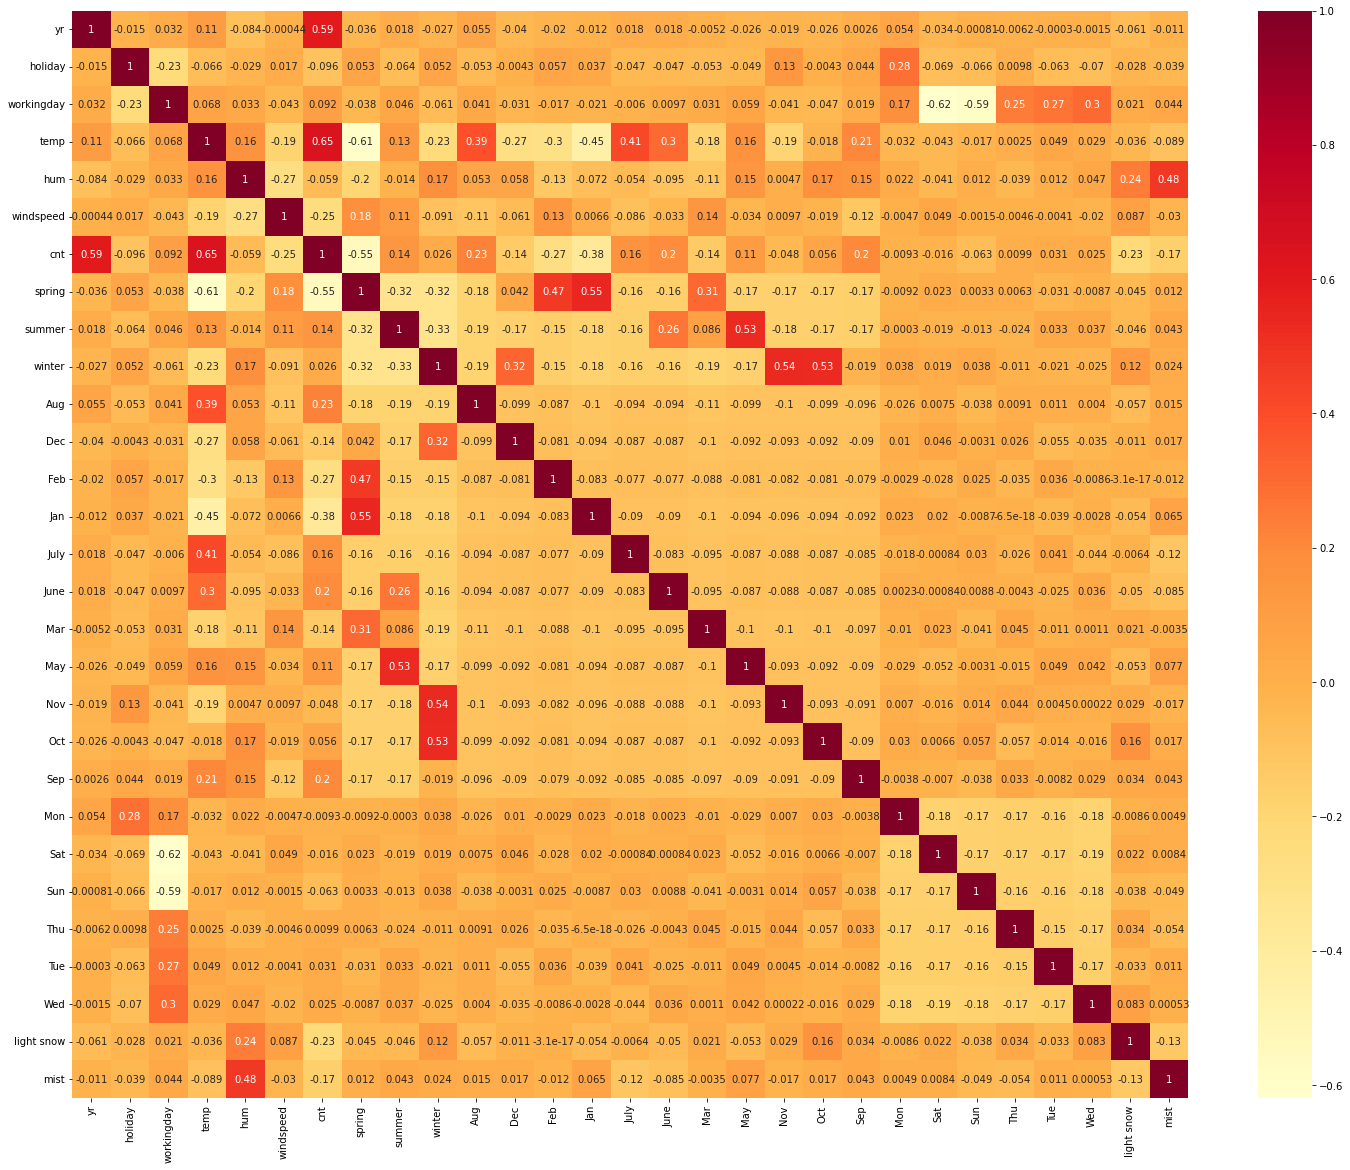

In [29]:
#Display heat map to check the correlation
plt.figure(figsize = (25,20))
sns.heatmap(df_train.corr(), annot=True, cmap = "YlOrRd")
plt.show()

# Diving data into X and Y

In [30]:
#Divide the data into X and y
y_train = df_train.pop('cnt')
X_train = df_train
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,spring,summer,winter,Aug,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,light snow,mist
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.498067,0.663106,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
111,0,0,1,0.345824,0.751824,0.380981,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


# We will use the sklearn library to follow Recursive feature elimination to create model

In [31]:
#importing libraries of sklearn
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [35]:
#creating model
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [38]:
#running RFE with num of variables = 15
rfe = RFE(lm, step = 15)
rfe = rfe.fit(X_train,y_train)

In [39]:
#List of variables selected
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 2),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Aug', False, 2),
 ('Dec', True, 1),
 ('Feb', False, 2),
 ('Jan', True, 1),
 ('July', False, 2),
 ('June', False, 2),
 ('Mar', False, 2),
 ('May', False, 2),
 ('Nov', True, 1),
 ('Oct', False, 2),
 ('Sep', True, 1),
 ('Mon', False, 2),
 ('Sat', False, 2),
 ('Sun', False, 2),
 ('Thu', False, 2),
 ('Tue', False, 2),
 ('Wed', False, 2),
 ('light snow', True, 1),
 ('mist', True, 1)]

In [40]:
#Columns where RFE support is True
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring', 'summer',
       'winter', 'Dec', 'Jan', 'Nov', 'Sep', 'light snow', 'mist'],
      dtype='object')

# Building model using statsmodel for the detailed statistics as sklearn dont give that

In [48]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [49]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [50]:
# Running the linear model 
lm = sm.OLS(y_train,X_train_rfe).fit()

In [51]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     188.5
Date:                Tue, 12 Jul 2022   Prob (F-statistic):          5.38e-188
Time:                        21:38:56   Log-Likelihood:                 509.49
No. Observations:                 510   AIC:                            -989.0
Df Residuals:                     495   BIC:                            -925.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3083      0.036      8.520      0.0

# We use two things to check the variable
# 1. Significance of p value
# 2. VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating VIF is:


1. High p-value, high VIF
2. High Low
    1. High p,low VIF - remove thses first
    2. Low p, High VIF - remove these after the two above
    3.Low p, low VIF (keep) - This is the ideal scenario

In [52]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,81.62
6,spring,5.08
3,temp,4.32
8,winter,3.63
7,summer,2.45
4,hum,1.91
11,Nov,1.77
10,Jan,1.67
14,mist,1.57
9,Dec,1.50


In [53]:
# constant has the highest VIF
#Lets drop the constant
#checking the VIF of the model 

#dropping the constant variables from the dataset
X_train_new = X_train_rfe.drop(['const'], axis = 1)

In [54]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,30.88
2,temp,16.35
4,windspeed,4.72
5,spring,4.25
7,winter,3.90
6,summer,2.50
13,mist,2.32
0,yr,2.09
10,Nov,1.84
9,Jan,1.74


In [55]:
#Build a model again to see the statistics
X_train_rfe2 = sm.add_constant(X_train_new)
lm2 = sm.OLS(y_train,X_train_rfe2).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     188.5
Date:                Tue, 12 Jul 2022   Prob (F-statistic):          5.38e-188
Time:                        21:41:11   Log-Likelihood:                 509.49
No. Observations:                 510   AIC:                            -989.0
Df Residuals:                     495   BIC:                            -925.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3083      0.036      8.520      0.0

In [56]:
#As Nov has high P value, we'll try to remove that first and then see
X_train_new3 = X_train_rfe2.drop(['Nov'], axis = 1)

In [57]:
#Check the vif value
vif = pd.DataFrame()
X = X_train_new3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,77.77
6,spring,4.91
3,temp,4.03
8,winter,3.40
7,summer,2.37
4,hum,1.91
10,Jan,1.65
13,mist,1.56
9,Dec,1.27
12,light snow,1.25


In [58]:
#Build a model again to see the statistics
X_train_rfe3 = sm.add_constant(X_train_new3)
lm3 = sm.OLS(y_train,X_train_rfe3).fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     201.4
Date:                Tue, 12 Jul 2022   Prob (F-statistic):          2.86e-188
Time:                        21:45:19   Log-Likelihood:                 507.38
No. Observations:                 510   AIC:                            -986.8
Df Residuals:                     496   BIC:                            -927.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2923      0.035      8.251      0.0

In [59]:
#Lets remove Dec
#As dec has high P value, we'll try to remove that first and then see
X_train_new4 = X_train_rfe3.drop(['Dec'], axis = 1)

In [60]:
#Check the vif value
vif = pd.DataFrame()
X = X_train_new4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,75.82
6,spring,4.89
3,temp,3.79
8,winter,3.39
7,summer,2.32
4,hum,1.89
9,Jan,1.56
12,mist,1.56
11,light snow,1.24
5,windspeed,1.21


In [61]:
#Build a model again to see the statistics
X_train_rfe4 = sm.add_constant(X_train_new4)
lm4 = sm.OLS(y_train,X_train_rfe4).fit()
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     217.7
Date:                Tue, 12 Jul 2022   Prob (F-statistic):          4.79e-189
Time:                        21:47:17   Log-Likelihood:                 506.42
No. Observations:                 510   AIC:                            -986.8
Df Residuals:                     497   BIC:                            -931.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2847      0.035      8.130      0.0

In [63]:
#lets drop spring
X_train_new5 = X_train_rfe4.drop(['spring'], axis = 1)

In [64]:
#Check the vif value
vif = pd.DataFrame()
X = X_train_new5
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,49.58
4,hum,1.87
3,temp,1.71
8,Jan,1.55
11,mist,1.55
7,winter,1.50
6,summer,1.28
10,light snow,1.24
5,windspeed,1.19
9,Sep,1.12


In [65]:
#Build a model again to see the statistics
X_train_rfe5 = sm.add_constant(X_train_new5)
lm5 = sm.OLS(y_train,X_train_rfe5).fit()
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     235.9
Date:                Tue, 12 Jul 2022   Prob (F-statistic):          1.85e-189
Time:                        21:57:32   Log-Likelihood:                 504.57
No. Observations:                 510   AIC:                            -985.1
Df Residuals:                     498   BIC:                            -934.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2454      0.028      8.645      0.0

In [66]:
#dropping jan
X_train_new6 = X_train_rfe5.drop(['Jan'], axis = 1)

In [67]:
#Check the vif value
vif = pd.DataFrame()
X = X_train_new6
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,44.97
4,hum,1.86
10,mist,1.55
3,temp,1.27
7,winter,1.25
9,light snow,1.23
6,summer,1.19
5,windspeed,1.18
8,Sep,1.11
1,yr,1.03


In [73]:
#Build a model again to see the statistics
X_train_new6 = sm.add_constant(X_train_new6)
lm6 = sm.OLS(y_train,X_train_new6).fit()
print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     256.9
Date:                Tue, 12 Jul 2022   Prob (F-statistic):          1.32e-189
Time:                        22:03:57   Log-Likelihood:                 502.03
No. Observations:                 510   AIC:                            -982.1
Df Residuals:                     499   BIC:                            -935.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2261      0.027      8.331      0.0

# Step 4, Residual Analysis

In [74]:

X_train_new6.columns


Index(['const', 'yr', 'holiday', 'temp', 'hum', 'windspeed', 'summer',
       'winter', 'Sep', 'light snow', 'mist'],
      dtype='object')

In [75]:
X_train_new6

,const,yr,holiday,temp,hum,windspeed,summer,winter,Sep,light snow,mist
576,1.0,1,0,0.815169,0.725633,0.264686,0,0,0,0,0
426,1.0,1,0,0.442393,0.640189,0.255342,0,0,0,0,1
728,1.0,1,0,0.245101,0.498067,0.663106,0,0,0,0,0
482,1.0,1,0,0.395666,0.504508,0.188475,1,0,0,0,1
111,1.0,0,0,0.345824,0.751824,0.380981,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,1,0,0.863973,0.679690,0.187140,0,0,0,0,0
53,1.0,0,0,0.202618,0.435939,0.111379,0,0,0,0,0
350,1.0,0,0,0.248216,0.577930,0.431816,0,1,0,0,1
79,1.0,0,0,0.462664,0.759870,0.529881,1,0,0,0,1


In [76]:
#getting the y_train_pred for residual analysis
y_train_pred = lm6.predict(X_train_new6)

<AxesSubplot:ylabel='Density'>

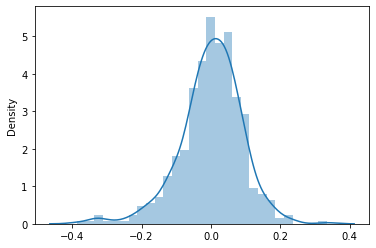

In [77]:
res = y_train - y_train_pred
sns.distplot(res)

In [78]:
#Assumption that error are normally distributed holds true

# Step 5. Predictions using the model

In [79]:
#create a list of numeric variables
num_vars = ['temp','hum','windspeed','cnt']

#2,transform the data

df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test[num_vars].head()

,temp,hum,windspeed,cnt
184,0.831783,0.657364,0.084219,0.692706
535,0.901354,0.610133,0.153728,0.712034
299,0.511964,0.837699,0.334206,0.303382
221,0.881625,0.437098,0.339570,0.547400
152,0.817246,0.314298,0.537414,0.569029


In [80]:
y_test = df_test.pop('cnt')

In [81]:
X_test = df_test

#add consttant

X_test_sm = sm.add_constant(X_test)

In [82]:
X_test_sm.head()

,const,yr,holiday,workingday,temp,hum,windspeed,spring,summer,winter,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,light snow,mist
184,1.0,0,1,0,0.831783,0.657364,0.084219,0,0,0,...,0,0,1,0,0,0,0,0,0,1
535,1.0,1,0,1,0.901354,0.610133,0.153728,0,1,0,...,0,0,0,0,0,0,0,1,0,0
299,1.0,0,0,1,0.511964,0.837699,0.334206,0,0,1,...,1,0,0,0,0,1,0,0,0,1
221,1.0,0,0,1,0.881625,0.437098,0.339570,0,0,0,...,0,0,0,0,0,0,0,1,0,0
152,1.0,0,0,1,0.817246,0.314298,0.537414,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [84]:
X_test_sm.columns

Index(['const', 'yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'spring', 'summer', 'winter', 'Aug', 'Dec', 'Feb', 'Jan', 'July',
       'June', 'Mar', 'May', 'Nov', 'Oct', 'Sep', 'Mon', 'Sat', 'Sun', 'Thu',
       'Tue', 'Wed', 'light snow', 'mist'],
      dtype='object')

In [88]:
#Removing the columns which are not the part of our model
X_test_new = X_test_sm[X_train_new6.columns]

In [89]:
y_test_pred = lm6.predict(X_test_new)

In [90]:
#evaluate
r2_score(y_true = y_test, y_pred = y_test_pred)

0.805174106600244

In [ ]:
#The model is overall good with the above r2score value